### NOTE
- Decision Tree Regression model is not well adapted to simple datasets (less number of training examples like 10-20, and less number of features like 1).

- No need to apply feature scaling to Decision Tree Regression or Random Forest Regression.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

- let us make use of custom dataset (taken from https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/)

In [24]:
dataset = np.array([
    ['Asset Flip', 100, 1000],
    ['Text Based', 500, 3000],
    ['Visual Novel', 1500, 5000],
    ['2D Pixel Art', 3500, 8000],
    ['2D Vector Art', 5000, 6500],
    ['Strategy', 6000, 7000],
    ['First Person Shooter', 8000, 15000],
    ['Simulator', 9500, 20000],
    ['Racing', 12000, 21000],
    ['RPG', 14000, 25000],
    ['Sandbox', 15500, 27000],
    ['Open-World', 16500, 30000],
    ['MMOFPS', 25000, 52000],
    ['MMORPG', 30000, 80000]
])

columns = ['Product', 'Production Cost', 'Profit']

dataset = pd.DataFrame(data = dataset, columns = columns)

dataset = dataset.astype({'Production Cost': 'int64', 'Profit': 'int64'})
print(dataset.dtypes)

dataset

Product            object
Production Cost     int64
Profit              int64
dtype: object


,Product,Production Cost,Profit
0,Asset Flip,100,1000
1,Text Based,500,3000
2,Visual Novel,1500,5000
3,2D Pixel Art,3500,8000
4,2D Vector Art,5000,6500
5,Strategy,6000,7000
6,First Person Shooter,8000,15000
7,Simulator,9500,20000
8,Racing,12000,21000
9,RPG,14000,25000


In [25]:
# get matrix of features and dependent variable vector
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [26]:
# visualise features
print(type(x))
print(x.shape)
print(x)

<class 'numpy.ndarray'>
(14, 1)
[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [27]:
# visualise target
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(14,)
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


# Training the Decision Tree Regression model on the whole dataset

- Since we have only 10 examples in the dataset, lets use the entire dataset.

- `sklearn` has a `tree` module which has `DecisionTreeRegressor` class.

In [34]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

# train the model
model = regressor.fit(x, y)

# this model variable can be used to plot the decision tree

# Predicting new result results

In [35]:
x_new = [
    [3750],
    [10000]
]
regressor.predict(x_new)

array([ 8000., 20000.])

# Visualising the decision tree

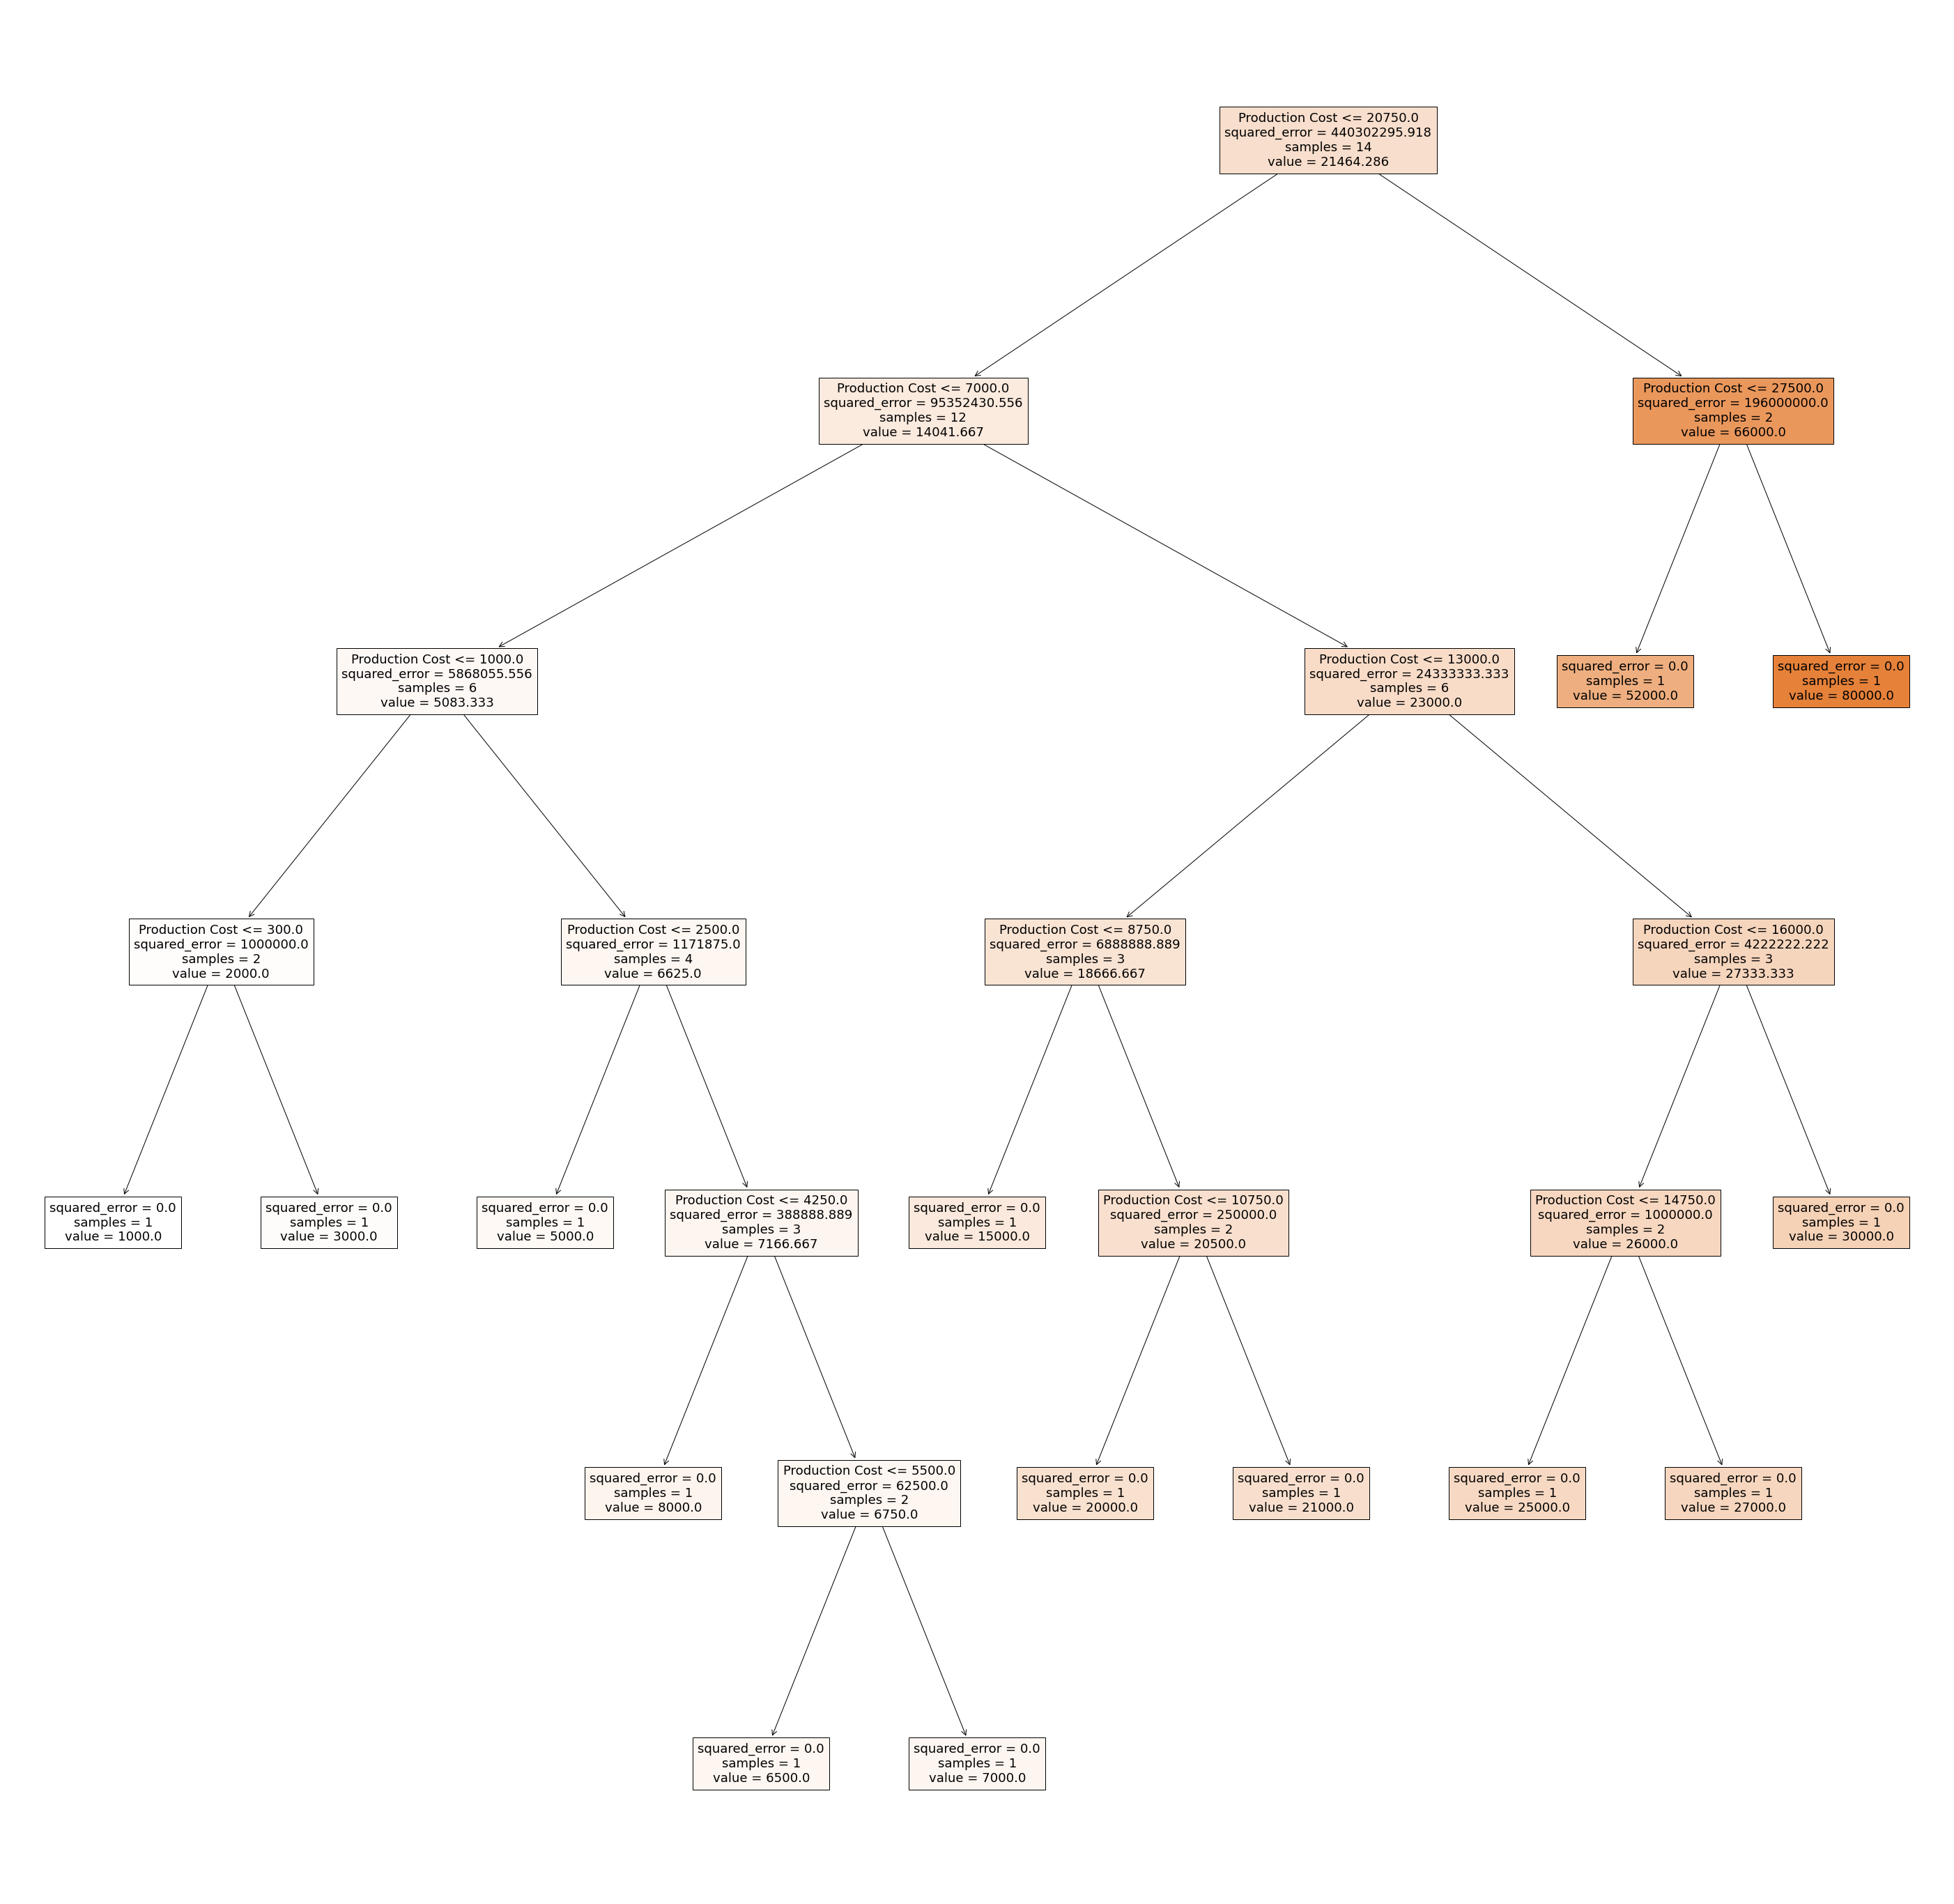

In [42]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(50,50))

_ = plot_tree(
    model, 
    feature_names = ['Production Cost'], 
    class_names = ['Profit'], 
    filled = True
)

# Visualising the Decision Tree Regression results (higher resolution)

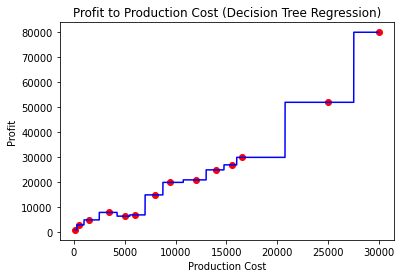

In [36]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
x_grid = np.arange(min(x), max(x), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
x_grid = x_grid.reshape((len(x_grid), 1)) 
  
# scatter plot for original data
plt.scatter(x, y, color = 'red')
  
# plot predicted data
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Production Cost')
  
# specify Y axis label
plt.ylabel('Profit')
  
# show the plot
plt.show()

- Decision Tree Regression model is not good for 2D datasets(one feature, one Dependent variable)

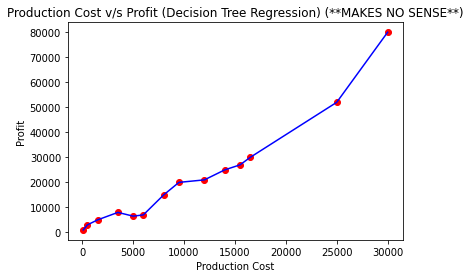

In [44]:
# in low resolution -> makes no sense

plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Production Cost v/s Profit (Decision Tree Regression) (**MAKES NO SENSE**)')
plt.xlabel('Production Cost')
plt.ylabel('Profit')
plt.show()